C:\Users\hippo\AppData\Local\Temp\ipykernel_25468\3654375118.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  content = content.append([[soup2[0].text,soup2[1].text,soup2[2].text,soup2[3].text,soup2[4].text,soup2[7].text]])


2330平均股利
https://i.imgur.com/HdrrL9f.png
image/png


<Figure size 432x288 with 0 Axes>

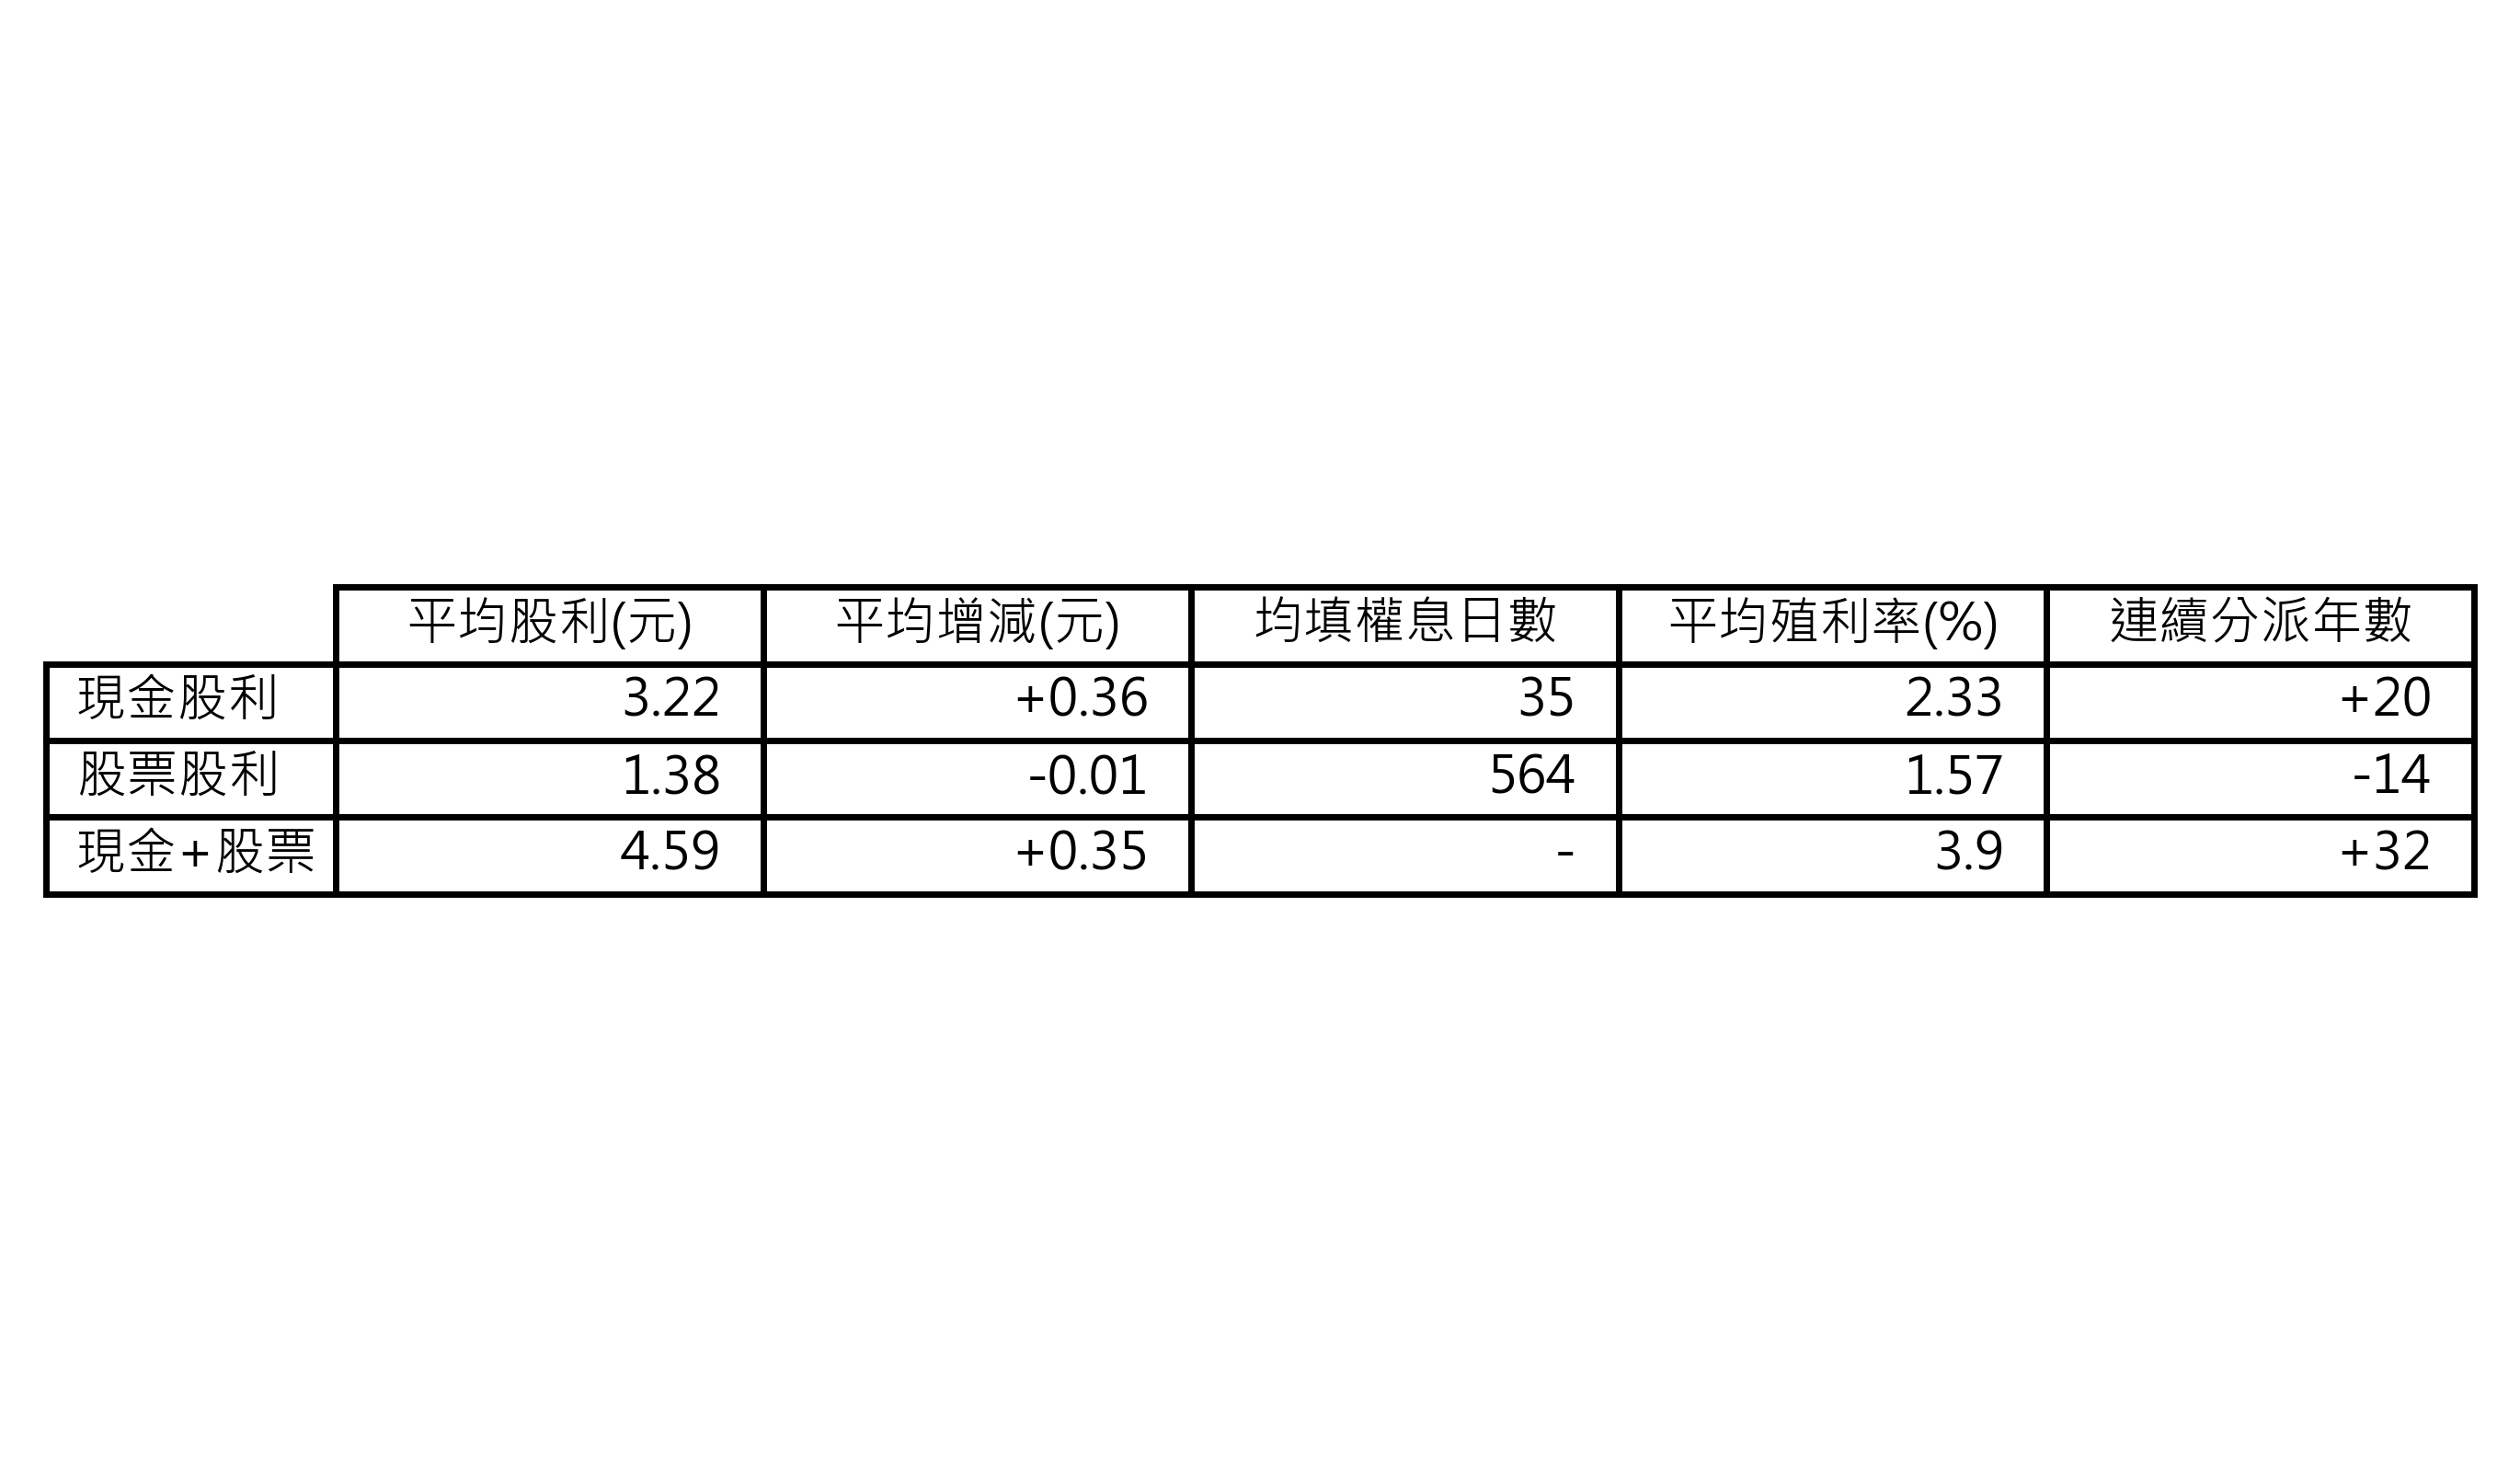

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pyimgur
message = 2330
url = "https://goodinfo.tw/StockInfo/StockDividendPolicy.asp?STOCK_ID=" + str(message)
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.63 Safari/537.36"
}
res = requests.get(url,headers=headers )
res.encoding = "utf-8"
soup = BeautifulSoup(res.text,"html.parser")
soup1 = soup.find_all("tr",{"align":"center","bgcolor":"white"})
title = ["類別","平均股利(元)","平均增減(元)","均填權息日數","平均殖利率(%)","連續分派年數"]
content = pd.DataFrame()
for i in range(4,7):
        soup2 = soup1[i].find_all("td")
        content = content.append([[soup2[0].text,soup2[1].text,soup2[2].text,soup2[3].text,soup2[4].text,soup2[7].text]])
content.columns = title
content.index = content["類別"]
content.drop("類別",axis=1,inplace = True)
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.figure('平均股利')            # 視窗名稱
plt.figure(dpi = 500)
ax = plt.axes(frame_on=False)# 不要額外框線
ax.xaxis.set_visible(False)  # 隱藏X軸刻度線
ax.yaxis.set_visible(False)  # 隱藏Y軸刻度線
pd.plotting.table(ax, content, loc='center')
plt.savefig(str(message) + "平均股利.png", bbox_inches = "tight")
CLIENT_ID = "1c11336262869d4"
PATH = str(message) + "平均股利.png" #A Filepath to an image on your computer"
title = str(message) + "平均股利"
im = pyimgur.Imgur(CLIENT_ID)
uploaded_image = im.upload_image(PATH, title=title)



In [4]:
import requests
from bs4 import BeautifulSoup
import jieba
import re
message = 2330
url = "https://tw.stock.yahoo.com/quote/"+str(message)+ "/dividend"
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.5359.125 Safari/537.36"
}
res = requests.get(url,headers= headers)
soup = BeautifulSoup(res.text,"html.parser")
soup1 = soup.find("p",{"class":"Mb(20px) Mb(12px)--mobile Fz(16px) Fz(18px)--mobile C($c-primary-text)"}).text
soup1

'已連 31 年發放股利，合計 136.90 元。近 5 年平均現金殖利率 : 2.87%'